# Business Understanding

Sebelum pandemi, Sebuah toko buku kecil berkembang pesat di pusat kota bersejarah Mainz. Toko tersebut sangat senang membangun hubungan pribadi dengan setiap kliennya, merekomendasikan buku-buku yang sesuai dengan selera pribadi mereka, dan membantu memperluas palet sastra mereka. Di kotanya dan sekitarnya, ia mengembangkan reputasi yang tangguh dengan basis pelanggan setia yang terhormat, yang menganggapnya lebih sebagai seorang penikmat buku daripada penjual tradisional.

Sayangnya, basis pelanggan setia ini tidak cukup untuk membuat bisnisnya menguntungkan. Jadi, seperti banyak pengecer tradisional, Toko buku juga bergantung pada pelanggan tetap.

Pada awal pandemi, sumber pendapatan ini lenyap. Untuk mempertahankan karyawannya dan menutupi biaya yang terus berlanjut, toko buku harus mencari sumber pendapatan alternatif.

Dengan tekad awal yang besar, ia memutuskan untuk mengembangkan usahanya dengan meluncurkan toko daring, yang ia yakini akan menyelamatkan usaha kesayangannya dari kebangkrutan.

Awalnya, pemilik toko dan karyawannya berusaha sebaik mungkin untuk memberikan rekomendasi yang sesuai untuk setiap produk secara manual. Namun, seiring bertambahnya jumlah produk dan karyawan berupaya untuk tetap berhubungan secara pribadi dengan klien melalui telepon dan email, proses manual ini tidak memungkinkan lagi.

Saat ini, toko tersebut tengah mencari sistem rekomendasi yang andal untuk memberikan rekomendasi yang tepat sasaran ke setiap halaman produk. Solusi ini harus memenuhi standar personalisasi yang tinggi dan hanya memerlukan sedikit dukungan manual untuk penerapannya.

**Problem Statements dan Goals**
* Bagaimana membuat sistem rekomendasi yang andal untuk memberikan rekomendasi yang tepat sasaran ke setiap halaman produk.
* Bagaimana sistem rekomendasi dapat memenuhi standar personalisasi yang tinggi dan hanya memerlukan sedikit dukungan manual untuk penerapannya.

**Membuat Sistem Rekomendasi dengan tujuan atau goals sebagai berikut:**
* Menghasilkan sejumlah rekomendasi buku yang dipersonalisasi untuk pengguna dengan teknik content-based filtering.
* Menghasilkan sejumlah rekomendasi buku yang sesuai dengan preferensi pengguna dan belum pernah dikunjungi sebelumnya dengan teknik collaborative filtering.

# Data Understanding

Dalam data understanding kita akan melihat dan memahami data, data rekomendasi buku terdiri dari 3 file csv yaitu “items.csv”, “transactions.csv”, dan “evalutation.csv”

## Load Data

Menyiapkan library awal yang dibutuhkan

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

Data disediakan dalam tiga berkas tersendiri. Satu berkas berisi transaksi **(“transactions.csv”)**, satu berkas berisi data item deskriptif **(“items.csv”)**, dan satu berkas terakhir **(“evaluation.csv”)** berisi templat untuk penyerahan hasil. Berikut ini beberapa hal yang perlu diperhatikan tentang berkas-berkas tersebut:



Setelah berhasil mendownload data selanjutnya adalah melakukan pembuatan direktory dataset untuk memudahkan pemanggilan data, berikut codenya:

In [2]:
# Membaca file CSV dengan delimiter yang benar
transaksi = pd.read_csv('/kaggle/input/book-recommendation/transactions.csv', delimiter='|')
items = pd.read_csv('/kaggle/input/book-recommendation/items.csv', delimiter='|')
evaluation = pd.read_csv('/kaggle/input/book-recommendation/evaluation.csv')

# Rename columns of transaksi DataFrame to reflect actual column names
transaksi.columns = ['sessionID', 'itemID', 'click', 'basket', 'order']

# Melihat total data
print('Jumlah data transaksi: ', len(transaksi.itemID.unique()))
print('Jumlah data item: ', len(items.itemID.unique()))
print('Jumlah data evaluasi: ', len(evaluation.itemID.unique()))

Jumlah data transaksi:  24909
Jumlah data item:  78030
Jumlah data evaluasi:  1000


Dari hasil diatas dapat diketahui jumlah masing-masing data, selanjutnya kita akan melakukan eksplorasi data.

## Univariate Exploratory Data Analysis

Berikut merupakan keterangan atau penjelasan dari masing-masing data:

* File “items.csv” adalah kumpulan data induk yang berisi fitur deskriptif. Fitur tersebut dapat berupa kategoris atau numerik. Daftar fitur dijelaskan dalam file “features.pdf”. Setiap baris data berisi deskripsi untuk satu item.

* File “transactions.csv” berisi informasi tentang klik, keranjang, dan pesanan selama periode tiga bulan. Setiap baris menampilkan satu transaksi untuk satu item. Semua atribut dijelaskan dalam file “features.pdf”.

* File “evalutation.csv” berisi daftar ID produk. Daftar ini merupakan bagian dari produk dari “items.csv” dan referensi untuk pengajuan.

Untuk melakukan rekomendasi buku variabel **items** dan **transaksi** yang akan digunakan sebagai variabel rekomendasi, sementara variabel **evaluasi** merupakan daftar nama itemID yang nantinya akan digabungkan pada variabel items.

**Melihat data pada transaksi**

Langkah berikut merupakan eksplorasi data transaksi, kita kan melihat isi dari varabel transaksi, berikut hasilnya:

In [3]:
#Melihat isi dan tipe data transaksi
transaksi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365143 entries, 0 to 365142
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   sessionID  365143 non-null  int64
 1   itemID     365143 non-null  int64
 2   click      365143 non-null  int64
 3   basket     365143 non-null  int64
 4   order      365143 non-null  int64
dtypes: int64(5)
memory usage: 13.9 MB


In [4]:
#Melihat ada berapa banyak entri yang unik
print('Banyak data: ', len(transaksi.sessionID .unique()))
print('Banyak data: ', len(transaksi.itemID .unique()))
print('Jumlah pesana yang diterima: ', transaksi.order.unique())
print('Jumlah klik: ', transaksi.click.unique())
print('Jumlah keranjang: ', transaksi.basket.unique())

Banyak data:  271983
Banyak data:  24909
Jumlah pesana yang diterima:  [ 0  1  2 13  3  4 21 27 12 14  5 19 22 11 10 25 15 20  6  7 23 26 28]
Jumlah klik:  [  1   2   0   8   4   3   5   6   7  10  12   9  11  14  16  13  22  20
  15  17  23  21  18 118  97  28  25  24  34  32  19  36]
Jumlah keranjang:  [  0   1   2   3 287   4  24   8   5  10   9  13  38  20  30  51  11   6
  23  14  58  48  65  21  29  26  36   7 150 100  18 268  28  16  52  25
  15  12 293  22  80 182 119  43  98]


Dalam hasil diatas terdapat 5 variabel dalam data transaksi yaitu sessionID, itemID, click,	basket,	dan order. selanjutnya untuk memudahkan dalam menganalisa data kita akan lihat 10 baris dari data awal transaksi.

In [5]:
#Melihat isi data transaksi
transaksi.head(10)

,sessionID,itemID,click,basket,order
0,0,21310,1,0,0
1,1,73018,1,0,0
2,2,19194,1,0,0
3,3,40250,1,0,0
4,4,46107,1,0,0
5,5,34217,1,0,0
6,6,31436,1,0,0
7,7,14576,1,1,0
8,7,17731,2,1,0
9,8,58723,1,0,0


Dari hasil diatas dapat diketahui variabel transaksi berikut penjelasannya:
* sessionID: Sesi pada setiap transaksi
* itemID: ID Buku
* click: buku yang dikunjungi atau dilihat
* basket: merupakan memasukan buku yang dipilih kedalam keranjang belanja
* order: merupakan buku yang terpesan atau dibeli pada setiap sesinya.

Selanjutnya kita melakukan eksplorasi dengan data lainnya.

**Melihat data items**

Data items merupakan daftar jenis buku, pengarang, penerbit dan topik buku, mari kita lihat apa saja yang dapat kita ketahui dari data items.

In [6]:
#Melihat isi dan tipe data items
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78030 entries, 0 to 78029
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   itemID      78030 non-null  int64 
 1   title       78030 non-null  object
 2   author      74790 non-null  object
 3   publisher   78021 non-null  object
 4   main topic  77772 non-null  object
 5   subtopics   78029 non-null  object
dtypes: int64(1), object(5)
memory usage: 3.6+ MB


In [7]:
print('Banyak data: ', len(items.itemID .unique()))
print('Banyak data: ', len(items.title .unique()))
print('Banyak data: ', len(items.author .unique()))

Banyak data:  78030
Banyak data:  72128
Banyak data:  35970


Dari hasil diatas dapat dilihat untuk data items terdapat 6 variabel atau kolom yaitu:
* itemID: ID Buku
* title: Judul buku
* author: Pengarang atau penulis buku
* publisher: penerbit buku
* main topic: Kategori Tema atau topik buku
* subtopics:

Dalam langkah ini kita dapat lebih mengetahui mulai dari judul buku sampai dengan topik atau tema buku yang disimbolkan dengan huruf kapital seperti A B dll. anda dapat melihat penjelasan simbol main topic data ini secara datail pada link berikut: https://ns.editeur.org/thema/en selanjutnya kita melihat isi data items.

In [8]:
#Melihat isi data items
items.head(10)

,itemID,title,author,publisher,main topic,subtopics
0,21310,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH]
1,73018,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]"
2,19194,Red Queen 1,Victoria Aveyard,Orion Publishing Group,YFH,"[5AP,FBA]"
3,40250,Meine Kindergarten-Freunde (Pirat),NaN,Ars Edition GmbH,YB,"[5AC,5AD,YBG,YBL,YF]"
4,46107,Mein großes Schablonen-Buch - Wilde Tiere,Elizabeth Golding,Edition Michael Fischer,WFTM,"[WD,WFTM,YBG,YBL,YBLD,YBLN1]"
5,34217,Ewig geliebt,J. R. Ward,Heyne Taschenbuch,FMR,"[1KBB-US-NAK,FMX,FRX,3MRBF]"
6,31436,Meine Sticker-Tiere,NaN,Ars Edition GmbH,YBG,"[5AD,YBG,YBLL]"
7,14576,Unsterblich 01 - Tor der Dämmerung,Julie Kagawa,Heyne Taschenbuch,YFE,"[5AQ,FM,YFE,YFH]"
8,17731,Unsterblich 02 - Tor der Nacht,Julie Kagawa,Heyne Taschenbuch,YFH,"[5AQ,FM,YFE,YFH]"
9,58723,Pedro und die Bettler von Cartagena,Ursula Hasler,dtv Verlagsgesellschaft,YFB,"[5AM,1KLSC]"


Jika dilihat pada informasi jumlah pada setiap variabel pada data items terdapat ketidak samaan jumlah data oleh sebab itu kita akan melakukan eksplorasi dengan melihat missing value pada data items.

In [9]:
#melihat missing value
items.isnull().sum()

itemID           0
title            0
author        3240
publisher        9
main topic     258
subtopics        1
dtype: int64

Dapat dilihat variabel author memiliki missing value sebanyak 3240, publisher 9 dan subtopics 1. sementara saya tidak melakukan perbaikan karena saya ingin melakukan eksplorasi data lain dan penggabungan data.

**Melihat data evaluation**

Seperti yang sudah di informasikan sebelumnya data evalution merupakan jumlah itemID pada data rekomendasi buku.

In [10]:
#Melihat isi dan tipe data evaluation
evaluation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   itemID  1000 non-null   int64
dtypes: int64(1)
memory usage: 7.9 KB


In [11]:
#Mengurutkan itemID pada data evaluation
evaluation = evaluation.sort_values('itemID')

In [12]:
#Melihat isi data evaluation
evaluation

,itemID
0,12
666,259
485,337
215,457
541,468
...,...
911,78486
69,78675
939,78680
233,78998


Dari hasil diatas data evaluation hanya berisi variabel itemID dengan banyak data 1000, ini berarti bahwa jumlah itemID pada data rekomendasi buku terdapat 1000 data.

## Data Preprocessing

Pertama pada tahap ini menggabungkan data evaluation dengan data items pada variabel itemID, hal ini untuk melihat nama pada masing-masing itemID yang terdapat pada data evaluation. parameter yang digunakan adalah:
* on: Parameter on digunakan untuk menentukan nama kolom atau list kolom yang akan digunakan sebagai kunci penggabungan, dalam kasus ini kita menggunkan variabel "itemID"
* how: Parameter how digunakan untuk menentukan metode penggabungan yang akan digunakan dalam kasus ini kta menggunakan "left"

> Ada empat opsi untuk parameter how:
> * 'inner': Menggabungkan hanya baris-baris yang memiliki nilai yang sama pada kolom kunci di kedua DataFrame. Ini adalah metode default jika parameter how tidak ditentukan.
> * 'left': Menggabungkan semua baris dari DataFrame kiri (df1) dengan baris-baris dari DataFrame kanan (df2) yang memiliki nilai yang sama pada kolom kunci. Jika ada baris di DataFrame kiri yang tidak memiliki nilai yang sama di DataFrame kanan, maka nilai kolom di DataFrame kanan akan diisi dengan NaN.
> * 'right': Menggabungkan semua baris dari DataFrame kanan (df2) dengan baris-baris dari DataFrame kiri (df1) yang memiliki nilai yang sama pada kolom kunci. Jika ada baris di DataFrame kanan yang tidak memiliki nilai yang sama di DataFrame kiri, maka nilai kolom di DataFrame kiri akan diisi dengan NaN.
> * 'outer': Menggabungkan semua baris dari kedua DataFrame. Jika ada baris di salah satu DataFrame yang tidak memiliki nilai yang sama di DataFrame lainnya, maka nilai kolom di DataFrame lainnya akan diisi dengan NaN.

In [13]:
# Menggabungkan data items dengan evaluation
evaluation_all = pd.merge(evaluation, items, on='itemID', how='left')
evaluation_all = evaluation_all.sort_values('itemID')
evaluation_all

,itemID,title,author,publisher,main topic,subtopics
0,12,Breathtaking,Reva Ryann Thompson,Xlibris,FM,[]
1,259,Angel Whitewolf,Francisco Toledo Rosenfield,Palibrio,FM,[]
2,337,The Princess and the Goblin,George Macdonald,Living Book Press,YFJ,[]
3,457,Of Human Hubris,James Kreis,AuthorHouse,FMH,[]
4,468,Von der Erde zum Mond,Jules Verne,Diogenes Verlag AG,FBC,[FL]
...,...,...,...,...,...,...
995,78486,Die Welt der 4 Jahreszeiten Band 2,Melanie Klein,epubli,FM,[]
996,78675,Between Shades of Gray,Ruta Sepetys,Penguin Books Ltd (UK),YXZW,"[5AN,1DTF,2AJBL,YFB,YFT,YN]"
997,78680,Los mejores libros para bebés (El concepto del...,Garcia Santiago,Fichas de preescolar,YBG,[]
998,78998,The Vortex at Thompson Park Volume 1,Michael Defranco,Lulu.com,FL,[]


Dari hasil diatas kita sudah dapat mengetahui urutan daftar nama pada itemID yang berjumlah 1000. Selanjutnya kita akan menggabungkan data evaluation_all dengan data transaksi. tujuan penggabungan ini untuk melihat nama itemID yang dikunjungi pada setiap sesi dalam data transaksi. Parameter yang digunakan adalah:
* on: Parameter on digunakan untuk menentukan nama kolom atau list kolom yang akan digunakan sebagai kunci penggabungan, dalam kasus ini kita menggunkan variabel "itemID"
* how: Parameter how digunakan untuk menentukan metode penggabungan yang akan digunakan dalam kasus ini kta menggunakan "inner" (Menggabungkan hanya baris-baris yang memiliki nilai yang sama pada kolom kunci di kedua DataFrame.)

In [14]:
# Menggabungkan evaluation_all dengan transaksi sesuai  pada sessionID
evaluation_transaksi = pd.merge(evaluation_all, transaksi, on='itemID', how='inner')
evaluation_transaksi

,itemID,title,author,publisher,main topic,subtopics,sessionID,click,basket,order
0,468,Von der Erde zum Mond,Jules Verne,Diogenes Verlag AG,FBC,[FL],3472,13,0,0
1,468,Von der Erde zum Mond,Jules Verne,Diogenes Verlag AG,FBC,[FL],22982,1,0,0
2,468,Von der Erde zum Mond,Jules Verne,Diogenes Verlag AG,FBC,[FL],32160,0,1,0
3,468,Von der Erde zum Mond,Jules Verne,Diogenes Verlag AG,FBC,[FL],50933,1,0,0
4,468,Von der Erde zum Mond,Jules Verne,Diogenes Verlag AG,FBC,[FL],74999,1,0,0
...,...,...,...,...,...,...,...,...,...,...
7706,78675,Between Shades of Gray,Ruta Sepetys,Penguin Books Ltd (UK),YXZW,"[5AN,1DTF,2AJBL,YFB,YFT,YN]",58597,1,0,0
7707,78675,Between Shades of Gray,Ruta Sepetys,Penguin Books Ltd (UK),YXZW,"[5AN,1DTF,2AJBL,YFB,YFT,YN]",106936,1,0,0
7708,78675,Between Shades of Gray,Ruta Sepetys,Penguin Books Ltd (UK),YXZW,"[5AN,1DTF,2AJBL,YFB,YFT,YN]",114399,1,0,0
7709,78675,Between Shades of Gray,Ruta Sepetys,Penguin Books Ltd (UK),YXZW,"[5AN,1DTF,2AJBL,YFB,YFT,YN]",212395,1,0,0


In [15]:
#Melihat isi dari data evaluation_transaksi
evaluation_transaksi.head(10)

,itemID,title,author,publisher,main topic,subtopics,sessionID,click,basket,order
0,468,Von der Erde zum Mond,Jules Verne,Diogenes Verlag AG,FBC,[FL],3472,13,0,0
1,468,Von der Erde zum Mond,Jules Verne,Diogenes Verlag AG,FBC,[FL],22982,1,0,0
2,468,Von der Erde zum Mond,Jules Verne,Diogenes Verlag AG,FBC,[FL],32160,0,1,0
3,468,Von der Erde zum Mond,Jules Verne,Diogenes Verlag AG,FBC,[FL],50933,1,0,0
4,468,Von der Erde zum Mond,Jules Verne,Diogenes Verlag AG,FBC,[FL],74999,1,0,0
5,468,Von der Erde zum Mond,Jules Verne,Diogenes Verlag AG,FBC,[FL],80019,0,0,1
6,468,Von der Erde zum Mond,Jules Verne,Diogenes Verlag AG,FBC,[FL],86595,5,0,0
7,468,Von der Erde zum Mond,Jules Verne,Diogenes Verlag AG,FBC,[FL],122731,1,0,0
8,468,Von der Erde zum Mond,Jules Verne,Diogenes Verlag AG,FBC,[FL],130739,1,0,0
9,468,Von der Erde zum Mond,Jules Verne,Diogenes Verlag AG,FBC,[FL],139758,0,0,1


Sampai langkah ini kita sudah dapat melihat nama buku apa saja yang dilihat pada setiap sesi dalam transaksi, namun ada hal yang sedikit menggangu dalam melihat sesinya yaitu variabel sessionID berada ditengah untuk memudahkan dalam melihat data maka kita akan memindahkan variabel sessionID kedepan atau pada kolom pertama berdampingan dengan itemID.

In [16]:
#Memindahkan kolom sessionID diawal kolom evalution_transaksi
sessionID = evaluation_transaksi.pop('sessionID')
evaluation_transaksi.insert(0, 'sessionID', sessionID)
evaluation_transaksi.head(50)

,sessionID,itemID,title,author,publisher,main topic,subtopics,click,basket,order
0,3472,468,Von der Erde zum Mond,Jules Verne,Diogenes Verlag AG,FBC,[FL],13,0,0
1,22982,468,Von der Erde zum Mond,Jules Verne,Diogenes Verlag AG,FBC,[FL],1,0,0
2,32160,468,Von der Erde zum Mond,Jules Verne,Diogenes Verlag AG,FBC,[FL],0,1,0
3,50933,468,Von der Erde zum Mond,Jules Verne,Diogenes Verlag AG,FBC,[FL],1,0,0
4,74999,468,Von der Erde zum Mond,Jules Verne,Diogenes Verlag AG,FBC,[FL],1,0,0
5,80019,468,Von der Erde zum Mond,Jules Verne,Diogenes Verlag AG,FBC,[FL],0,0,1
6,86595,468,Von der Erde zum Mond,Jules Verne,Diogenes Verlag AG,FBC,[FL],5,0,0
7,122731,468,Von der Erde zum Mond,Jules Verne,Diogenes Verlag AG,FBC,[FL],1,0,0
8,130739,468,Von der Erde zum Mond,Jules Verne,Diogenes Verlag AG,FBC,[FL],1,0,0
9,139758,468,Von der Erde zum Mond,Jules Verne,Diogenes Verlag AG,FBC,[FL],0,0,1


Dengan hasil diatas kita dapat dengan mudah melihat itemID apa yang dilihat pada setiap sesinya.

In [17]:
#Melihat jumlah data evaluation_transaksi
evaluation_transaksi.shape

(7711, 10)

Dari hasil tersebut terdapat 7711 baris data dengan 10 kolom dalam data tersebut.

In [18]:
#Melihat statistik data
evaluation_transaksi.describe()

,sessionID,itemID,click,basket,order
count,7711.000000,7711.000000,7711.000000,7711.000000,7711.000000
mean,139422.371807,41136.499546,1.303722,0.135780,0.051226
std,80506.902265,21655.597082,1.636670,0.370235,0.223974
min,16.000000,468.000000,0.000000,0.000000,0.000000
25%,69586.000000,23256.000000,1.000000,0.000000,0.000000
50%,139197.000000,40692.000000,1.000000,0.000000,0.000000
75%,207651.000000,58358.000000,1.000000,0.000000,0.000000
max,279343.000000,78675.000000,97.000000,3.000000,2.000000


In [19]:
#mengurutkan data berdasarkan sessionID
evaluation_transaksi = evaluation_transaksi.sort_values('sessionID')
evaluation_transaksi.head(50)

,sessionID,itemID,title,author,publisher,main topic,subtopics,click,basket,order
1123,16,15581,Der Herr der Ringe,J. R. R. Tolkien,Klett-Cotta Verlag,FMB,"[FYT,YFH]",0,1,0
6075,34,62630,The Night Parade,Kathryn Tanquary,SOURCEBOOKS JABBERWOCKY,YFH,"[1F,YFJ]",1,0,0
6060,55,62464,Trötsch Mein erstes Ausmalbuch,NaN,Trötsch Verlag GmbH,YBL,[YB],1,0,0
283,146,6798,Kernstaub,Marie Graßhoff,Drachenmond Verlag,NaN,[FM],1,0,0
4855,148,47684,Der X-Klub (Eine Krinar Erzählung),"Anna Zaires, Dima Zales",MOZAIKA LLC,FR,[],1,0,0
826,167,13772,Le Petit Prince (French),Antoine de Saint-Exupery,Houghton Mifflin Harcourt,YF,[5AL],1,0,0
4402,180,42531,Wovon du träumst,Kira Gembri,Arena Verlag GmbH,YFM,"[5AQ,YFN,YFQ]",0,0,1
6743,205,74398,ONE OF US IS LYING,Karen M. McManus,cbt,YFCB,"[5AQ,1KBB,1KBB-US-WPCD,3MRBF]",1,0,0
5769,207,58358,Mein Zauberwald,Johanna Basford,Knesebeck Von Dem GmbH,YBL,"[5AJ,WFA,WFX,WZG,YN]",1,0,0
1969,241,24603,The Hobbit,John Ronald Reuel Tolkien,Harper Collins Publ. UK,FM,[],1,0,0


Setelah kita melihat data yang akan dijadikan data rekomendasi buku terlebih dahulu kita melihat missing value pada data kita, karena pada langkah diatas kita melihat missing value pada data maka dalam tahap ini akan kita selesaikan dan bersihkan datanya.

In [20]:
#melihat missing value data evalution_all
evaluation_transaksi.isnull().sum()

sessionID        0
itemID           0
title            0
author        2094
publisher        1
main topic      37
subtopics        0
click            0
basket           0
order            0
dtype: int64

Terlihat data missing pada 3 variabel yaitu variabel author, publisher dan main topic. karena data bertipe object dan keterbatasan dalam pengetahuan data maka data yang memiliki missing value akan dihapus.

In [21]:
#Menghapus variabel yang memiliki missing value
evaluation_transaksi = evaluation_transaksi.dropna()
evaluation_transaksi.shape

(5579, 10)

In [22]:
evaluation_transaksi.isnull().sum()

sessionID     0
itemID        0
title         0
author        0
publisher     0
main topic    0
subtopics     0
click         0
basket        0
order         0
dtype: int64

Setelah dihapus data berjumlah 5579 data dengan 10 kolom, dan sudah terlihat juga data yang kita miliki sudah bersih atau tidak ada lagi missing value.

In [23]:
#Melihat isi data
evaluation_transaksi

,sessionID,itemID,title,author,publisher,main topic,subtopics,click,basket,order
1123,16,15581,Der Herr der Ringe,J. R. R. Tolkien,Klett-Cotta Verlag,FMB,"[FYT,YFH]",0,1,0
6075,34,62630,The Night Parade,Kathryn Tanquary,SOURCEBOOKS JABBERWOCKY,YFH,"[1F,YFJ]",1,0,0
4855,148,47684,Der X-Klub (Eine Krinar Erzählung),"Anna Zaires, Dima Zales",MOZAIKA LLC,FR,[],1,0,0
826,167,13772,Le Petit Prince (French),Antoine de Saint-Exupery,Houghton Mifflin Harcourt,YF,[5AL],1,0,0
4402,180,42531,Wovon du träumst,Kira Gembri,Arena Verlag GmbH,YFM,"[5AQ,YFN,YFQ]",0,0,1
...,...,...,...,...,...,...,...,...,...,...
5127,279082,49234,Hör mal: Die Fahrzeuge,Christian Zimmer,Carlsen Verlag GmbH,YNTR,"[5ABK,YBC,YBG,YBLT,YNTR]",1,1,0
485,279091,10482,Diary of a Wimpy Kid 03. The Last Straw,Jeff Kinney,Penguin Books Ltd (UK),YNUC,"[5AH,5AJ,5AL,X,YFB,YFN,YFQ]",1,0,0
6088,279178,62728,Ren Dhark - Weg ins Weltall 97: Die Geheimniss...,"Hendrik M. Bekker, Jan Gardemann, Jessica Keppler",HJB Verlag & Shop KG,FLS,[],1,0,0
460,279310,9197,Symptoms of Being Human,Jeff Garvin,BALZER & BRAY,YXQF,"[YF,YXB,YXW]",1,1,0


Untuk lebih jelas melihat pembelian buku kita dapat melihat dengan melakukan urutan berdasarkan itemID, disini dapat dilihat pembelian buku dengan itemID yang sama pada setiap sesi dalam toko buku, menarik bukan. berikut codenya:

In [24]:
#mengurutkan data berdasarkan itemID
evaluation_transaksi = evaluation_transaksi.sort_values('itemID')
evaluation_transaksi

,sessionID,itemID,title,author,publisher,main topic,subtopics,click,basket,order
1,22982,468,Von der Erde zum Mond,Jules Verne,Diogenes Verlag AG,FBC,[FL],1,0,0
18,262332,468,Von der Erde zum Mond,Jules Verne,Diogenes Verlag AG,FBC,[FL],1,0,0
8,130739,468,Von der Erde zum Mond,Jules Verne,Diogenes Verlag AG,FBC,[FL],1,0,0
12,178721,468,Von der Erde zum Mond,Jules Verne,Diogenes Verlag AG,FBC,[FL],1,0,0
14,195887,468,Von der Erde zum Mond,Jules Verne,Diogenes Verlag AG,FBC,[FL],1,0,0
...,...,...,...,...,...,...,...,...,...,...
7705,48638,78675,Between Shades of Gray,Ruta Sepetys,Penguin Books Ltd (UK),YXZW,"[5AN,1DTF,2AJBL,YFB,YFT,YN]",1,0,0
7709,212395,78675,Between Shades of Gray,Ruta Sepetys,Penguin Books Ltd (UK),YXZW,"[5AN,1DTF,2AJBL,YFB,YFT,YN]",1,0,0
7710,237676,78675,Between Shades of Gray,Ruta Sepetys,Penguin Books Ltd (UK),YXZW,"[5AN,1DTF,2AJBL,YFB,YFT,YN]",2,0,0
7706,58597,78675,Between Shades of Gray,Ruta Sepetys,Penguin Books Ltd (UK),YXZW,"[5AN,1DTF,2AJBL,YFB,YFT,YN]",1,0,0


Sebelum melangkah lebih jauh kita akan melihat berapa jumlah buku berdasarkan itemID.

In [25]:
#Mengecek berapa banyak jumlah total buku berdasarkan itemID
len(evaluation_transaksi.itemID.unique())


448

In [26]:
# Mengecek kategori buku yang unik
evaluation_transaksi.title.unique()

array(['Von der Erde zum Mond',
       'A Song of Ice and Fire 05. A Dance with Dragons',
       'Das Haus der Treppen',
       "Pokemon Adventures Collector's Edition, Vol. 8",
       'The Complete Works Of H.P Lovecraft', 'Kitten and the Dojo Code',
       'The New Republic of Texas',
       'Verlieb dich nie in einen Herzensbrecher',
       'Gefangen in den Universen', 'School of Fear',
       'Das Tagebuch des Dummikus Maximus im alten Rom 01 - Doof zu sein war noch nie einfach -',
       'Portobello', 'Das ewige Spiel', 'Die Stadt der singenden Flamme',
       'Paradise Valley - Set', 'Haunted',
       "Snoopy: What's Wrong with Dog Lips? (PEANUTS AMP! Series Book 9)",
       'Was Jungs mit 15 wollen und warum ich das weiß',
       'Hochgradig unlogisches Verhalten', 'Seefeuer',
       'The Naughtiest Unicorn at Sports Day',
       'Space Cadet - Weltraum-Patrouille', 'Run Wild',
       'Mit den Augen der Orcas', 'Dragonlance Chronicles',
       'Secret Kingdom: Mermaid Magic', 'T

In [27]:
#Melihat jumlah buku pada data
evaluation_transaksi.title.value_counts()

title
ONE OF US IS LYING                                            718
Der Herr der Ringe                                            411
Das Lied von Eis und Feuer 04. Die Saat des goldenen Löwen    188
The Passengers                                                183
Hör mal: Die Fahrzeuge                                        180
                                                             ... 
The Coventry Gardens Serial Killer                              1
DER ZÄRTLICHE TOD                                               1
Bus 22                                                          1
Goldie Blox and the Best! Pet! Ever! (Goldieblox)               1
Doctor Who - Kriegsmaschinen                                    1
Name: count, Length: 447, dtype: int64

Selanjutnya, kita hanya akan menggunakan data unik untuk dimasukkan ke dalam proses pemodelan. Oleh karena itu, kita perlu menghapus data yang duplikat dengan fungsi drop_duplicates(). Dalam hal ini, kita membuang data duplikat pada kolom ‘itemID’. Implementasikan kode berikut.

In [28]:
# Membuang data duplikat pada variabel
evaluation_transaksi = evaluation_transaksi.drop_duplicates('itemID')
evaluation_transaksi

,sessionID,itemID,title,author,publisher,main topic,subtopics,click,basket,order
1,22982,468,Von der Erde zum Mond,Jules Verne,Diogenes Verlag AG,FBC,[FL],1,0,0
26,29773,636,A Song of Ice and Fire 05. A Dance with Dragons,George R. R. Martin,Harper Collins Publ. UK,FL,[FM],1,0,0
75,113921,687,Das Haus der Treppen,William Sleator,dtv Verlagsgesellschaft,YFC,"[5AQ,YFE,YFG]",1,0,0
93,156651,851,"Pokemon Adventures Collector's Edition, Vol. 8",Hidenori Kusaka,"Viz Media, Subs. of Shogakukan Inc",XADC,[YF],1,0,0
94,64946,1071,The Complete Works Of H.P Lovecraft,H. P Lovecraft,Sahara Publisher Books,FL,[],1,0,0
...,...,...,...,...,...,...,...,...,...,...
7689,24287,77956,Otherland 3,Tad Williams,Klett-Cotta Verlag,FYT,"[FL,FM,FYT]",0,1,0
7691,57243,78181,Im Schatten des Sonnenkönigs - Die Gabe,E.M. Castellan,cbt,YFHR,"[5AQ,1DDF-FR-LA,YFT,3MGQ]",1,0,0
7694,143862,78241,Laqua - Der Fluch der schwarzen Gondel,Nina Blazon,cbt,YFC,"[5AL,5AX,1DST-IT-NVE,YFC,YFH]",0,1,1
7697,105929,78279,The General,Robert Muchamore,Hachette Children's Group,YFC,[5AK],2,2,0


Jika dilihat kolom subtopics tidak terlalu mempengaruhi data karena sudah ada pada main topik maka kita akan menghapus kolom subtopic.

In [29]:
#menghapus variabel atau kolom subtopics
evaluation_transaksi = evaluation_transaksi.drop(['subtopics'], axis=1)
evaluation_transaksi

,sessionID,itemID,title,author,publisher,main topic,click,basket,order
1,22982,468,Von der Erde zum Mond,Jules Verne,Diogenes Verlag AG,FBC,1,0,0
26,29773,636,A Song of Ice and Fire 05. A Dance with Dragons,George R. R. Martin,Harper Collins Publ. UK,FL,1,0,0
75,113921,687,Das Haus der Treppen,William Sleator,dtv Verlagsgesellschaft,YFC,1,0,0
93,156651,851,"Pokemon Adventures Collector's Edition, Vol. 8",Hidenori Kusaka,"Viz Media, Subs. of Shogakukan Inc",XADC,1,0,0
94,64946,1071,The Complete Works Of H.P Lovecraft,H. P Lovecraft,Sahara Publisher Books,FL,1,0,0
...,...,...,...,...,...,...,...,...,...
7689,24287,77956,Otherland 3,Tad Williams,Klett-Cotta Verlag,FYT,0,1,0
7691,57243,78181,Im Schatten des Sonnenkönigs - Die Gabe,E.M. Castellan,cbt,YFHR,1,0,0
7694,143862,78241,Laqua - Der Fluch der schwarzen Gondel,Nina Blazon,cbt,YFC,0,1,1
7697,105929,78279,The General,Robert Muchamore,Hachette Children's Group,YFC,2,2,0


Setelah data tidak ada lagi yang duplikat dan lain sebagainya selanjutnya kita akan merubah nama pada variabel atau kolom dan mengkonversinya dalam bentuk list.

In [30]:
# Mengonversi data series ‘itemID’ menjadi dalam bentuk list
buku_id = evaluation_transaksi['itemID'].tolist()

# Mengonversi data series ‘title’ menjadi dalam bentuk list
judul_buku = evaluation_transaksi['title'].tolist()

# Mengonversi data series ‘author’ menjadi dalam bentuk list
penulis_buku = evaluation_transaksi['author'].tolist()

# Mengonversi data series ‘publisher’ menjadi dalam bentuk list
penerbit_buku = evaluation_transaksi['publisher'].tolist()

# Mengonversi data series ‘main topic’ menjadi dalam bentuk list
topik_buku = evaluation_transaksi['main topic'].tolist()

print(len(buku_id))
print(len(judul_buku))
print(len(penulis_buku))
print(len(penerbit_buku))
print(len(topik_buku))

448
448
448
448
448


Tahap berikutnya, kita akan membuat dictionary untuk menentukan pasangan key-value pada data id, judul_buku, penulis_buku, penerbit_buku dan topik_buku yang telah kita siapkan sebelumnya.

In [31]:
# Membuat dictionary untuk data buku_id, judul_buku, penulis_buku, penerbit_buku, topik_buku
data_buku = {'id': buku_id, 'judul_buku': judul_buku, 'penulis_buku': penulis_buku, 'penerbit_buku': penerbit_buku, 'topik_buku': topik_buku}
# Membuat dataframe dari dictionary data_buku
df_buku = pd.DataFrame(data_buku)
df_buku

,id,judul_buku,penulis_buku,penerbit_buku,topik_buku
0,468,Von der Erde zum Mond,Jules Verne,Diogenes Verlag AG,FBC
1,636,A Song of Ice and Fire 05. A Dance with Dragons,George R. R. Martin,Harper Collins Publ. UK,FL
2,687,Das Haus der Treppen,William Sleator,dtv Verlagsgesellschaft,YFC
3,851,"Pokemon Adventures Collector's Edition, Vol. 8",Hidenori Kusaka,"Viz Media, Subs. of Shogakukan Inc",XADC
4,1071,The Complete Works Of H.P Lovecraft,H. P Lovecraft,Sahara Publisher Books,FL
...,...,...,...,...,...
443,77956,Otherland 3,Tad Williams,Klett-Cotta Verlag,FYT
444,78181,Im Schatten des Sonnenkönigs - Die Gabe,E.M. Castellan,cbt,YFHR
445,78241,Laqua - Der Fluch der schwarzen Gondel,Nina Blazon,cbt,YFC
446,78279,The General,Robert Muchamore,Hachette Children's Group,YFC


In [32]:
#menyimpan data df_buku
df_buku.to_csv('/kaggle/working/buku_final.csv', index=False)

## Model Development dengan Content Based Filtering

Pada tahap inilah Anda mengembangkan sistem rekomendasi dengan teknik content based filtering. Ingatlah, teknik content based filtering akan merekomendasikan item yang mirip dengan item yang disukai pengguna di masa lalu. Pada tahap ini, Anda akan menemukan representasi fitur penting dari setiap kategori masakan dengan tfidf vectorizer dan menghitung tingkat kesamaan dengan cosine similarity. Setelah itu, Anda akan membuat sejumlah rekomendasi restoran untuk pelanggan berdasarkan kesamaan yang telah dihitung sebelumnya.

In [33]:
#memanggil dan melihat data
df_buku.sample(5)

,id,judul_buku,penulis_buku,penerbit_buku,topik_buku
313,56453,Owl at Home,Arnold Lobel,HARPERCOLLINS,YFQ
299,53793,Magnus Chase 02 and the Hammer of Thor,Rick Riordan,Penguin Books Ltd (UK),YFC
304,54612,World of Warcraft: Exploring Azeroth: The East...,Christie Golden,BLIZZARD ENTERTAINMENT,FL
303,54066,Im Schatten von Atlantis,Lynne Hardy,Uhrwerk,WDHW
342,61125,The Assassin's Blade,Sarah J. Maas,Bloomsbury UK,YFHR


### Modeling Content Based Filtering

Pada Model ini kita akan melakukan pendekatan dengan satu variabel kunci dan dengan banyak variabel kunci dalam membuat rekomendasi buku.

Dalam content-based filtering dengan satu variabel kunci, sistem rekomendasi menggunakan satu karakteristik utama, seperti topik buku dalam rekomendasi buku atau film. Sistem ini membandingkan variabel kunci yang sama antar item untuk menemukan kesamaan, sehingga dapat memberikan rekomendasi yang sesuai dengan preferensi pengguna terhadap variabel tunggal ini.

Namun, pendekatan ini sering kali terlalu sederhana karena tidak mempertimbangkan informasi tambahan yang relevan. Misalnya, jika hanya menggunakan genre, sistem mungkin melewatkan faktor lain seperti penulis atau gaya bahasa yang juga dapat memengaruhi preferensi pengguna.

Di sisi lain, content-based filtering dengan banyak variabel kunci melibatkan penggunaan beberapa karakteristik atau fitur dari item untuk menghasilkan rekomendasi, seperti genre, penulis, tahun terbit, dan sinopsis pada buku. Dengan lebih banyak variabel, sistem dapat memberikan rekomendasi yang lebih kaya dan sesuai karena mempertimbangkan berbagai aspek yang mungkin relevan bagi pengguna.

**Content Based Filtering dengan satu variabel kunci**

**lebihan dan Kekurangan**
Dengan Satu Variabel Kunci

* lebihan: Mudah diimplementasikan, lebih cepat dan ringan secara komputasi.
* kurangan: Cenderung memberikan rekomendasi yang kurang akurat karena hanya mempertimbangkan satu faktor; kurang mampu memberikan rekomendasi yang bervariasi.

**TF-IDF Vectorizer**

Pada tahap ini, kita akan membangun sistem rekomendasi sederhana berdasarkan Topik buku pada sebuah toko buku. Anda telah belajar mengenai TF-IDF Vectorizer pada modul Sentiment Analysis. Teknik tersebut juga akan digunakan pada sistem rekomendasi untuk menemukan representasi fitur penting dari setiap judul_buku dan penulis.

Sama seperti proyek sentiment analysis, pada proyek ini, kita juga menggunakan fungsi tfidfvectorizer() dari library sklearn. Jalankan kode berikut

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data penulis_buku
tf.fit(df_buku['topik_buku'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['aklc', 'avp', 'dbs', 'dca', 'fb', 'fba', 'fbc', 'fd', 'fdb',
       'fdk', 'ffd', 'fhk', 'fhq', 'fhx', 'fj', 'fk', 'fkm', 'fkw', 'fl',
       'flc', 'flg', 'flp', 'flpb', 'flq', 'flr', 'fls', 'flu', 'fm',
       'fmb', 'fmh', 'fmk', 'fmm', 'fmr', 'fmt', 'fmw', 'fmx', 'fn', 'fp',
       'fr', 'frd', 'frt', 'fup', 'fv', 'fxr', 'fyb', 'fyt', 'jbfv1',
       'jbsf11', 'jnla', 'qrmp', 'vfjl', 'vxqm', 'wbq', 'wdhw', 'wdkx',
       'wf', 'wftm', 'wfx', 'xadc', 'ybcs', 'ybg', 'ybgc', 'ybl', 'yblj',
       'yf', 'yfa', 'yfb', 'yfc', 'yfca', 'yfcb', 'yfcf', 'yfd', 'yfe',
       'yfh', 'yfhr', 'yfj', 'yfm', 'yfn', 'yfp', 'yfq', 'yfr', 'yfs',
       'yft', 'yfzr', 'yfzz', 'yndb', 'ynhd', 'ynmf', 'ynml', 'ynnb',
       'ynnj22', 'ynnv', 'yntr', 'ynuc', 'ynvp', 'ynwd4', 'ynww', 'ynxb',
       'ypca2', 'ypck2', 'yxe', 'yxfd', 'yxhb', 'yxhl', 'yxld2', 'yxqf',
       'yxzw', 'yzg'], dtype=object)

Selanjutnya, lakukan fit dan transformasi ke dalam bentuk matriks.

In [35]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(df_buku['topik_buku'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(448, 108)

Perhatikanlah, matriks yang kita miliki berukuran (448, 108). Nilai 448 merupakan ukuran data dan 108 merupakan matrik topik_buku.

Untuk menghasilkan vektor tf-idf dalam bentuk matriks, kita menggunakan fungsi todense(). Jalankan kode berikut.

In [36]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]])

Selanjutnya, mari kita lihat matriks tf-idf untuk beberapa buku (judul_buku) dan topik buku (topik_buku). Terapkan kode berikut.

In [37]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan topik_buku
# Baris diisi dengan judul_buku
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=df_buku.judul_buku
).sample(22, axis=1).sample(50, axis=0)

,ynww,fp,fd,dbs,yntr,ynml,yxqf,flp,yfn,flq,...,jbsf11,aklc,ypck2,fdb,wftm,flr,dca,flg,yfe,fls
judul_buku,,,,,,,,,,,,,,,,,,,,,
Krieg der Klone,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Re-zoom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Das Tor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
The One and Only Ivan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LENSMEN-Zyklus / DIE GALAKTISCHE PATROUILLE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Der silberne Schlüssel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Companions,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mark of the Finder,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Der Drache erwacht,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Output matriks tf-idf di atas menunjukkan judul buku **Companions** memiliki kategori topik buku **fd**. **Companions**, matriks menunjukan bahwa judul buku tersebut merupakan buku dengan topik **fd**. Hal ini terlihat dari nilai matriks 1.0 pada topik buku **fd**.

Sampai di sini, kita telah berhasil mengidentifikasi representasi fitur penting dari setiap topik buku dengan fungsi tfidfvectorizer. Kita juga telah menghasilkan matriks yang menunjukkan korelasi antara topik buku dengan judul buku. Selanjutnya, kita akan menghitung derajat kesamaan antara satu judul_buku dengan judul_buku lainnya untuk menghasilkan kandidat buku yang akan direkomendasikan.

**Cosine Similarity**

Pada tahap sebelumnya, kita telah berhasil mengidentifikasi korelasi antara judul buku dengan topik buku. Sekarang, kita akan menghitung derajat kesamaan (similarity degree) antar judul buku dengan teknik cosine similarity. Di sini, kita menggunakan fungsi cosine_similarity dari library sklearn.

Jalankan kode berikut.

In [38]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Pada tahapan ini, kita menghitung cosine similarity dataframe tfidf_matrix yang kita peroleh pada tahapan sebelumnya. Dengan satu baris kode untuk memanggil fungsi cosine similarity dari library sklearn, kita telah berhasil menghitung kesamaan (similarity) antar buku. Kode di atas menghasilkan keluaran berupa matriks kesamaan dalam bentuk array.

Selanjutnya, mari kita lihat matriks kesamaan setiap jdul buku dengan menampilkan nama judul buku dalam 5 sampel kolom (axis = 1) dan 10 sampel baris (axis=0). Jalankan kode berikut.

In [39]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa judul_buku
cosine_sim_df = pd.DataFrame(cosine_sim, index=df_buku['judul_buku'], columns=df_buku['judul_buku'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap buku
cosine_sim_df

Shape: (448, 448)


judul_buku,Von der Erde zum Mond,A Song of Ice and Fire 05. A Dance with Dragons,Das Haus der Treppen,"Pokemon Adventures Collector's Edition, Vol. 8",The Complete Works Of H.P Lovecraft,Kitten and the Dojo Code,The New Republic of Texas,Verlieb dich nie in einen Herzensbrecher,Gefangen in den Universen,School of Fear,...,A Darkest Minds 04: The Darkest Legacy,Speak,Kamo 04: Kamo l'idée du siècle,Die Stadt (Finsterzeit 3),WAS IST WAS Quiz Rekorde der Technik. Über 100 Fragen und Antworten! Mit Spielanleitung und Punktewe,Otherland 3,Im Schatten des Sonnenkönigs - Die Gabe,Laqua - Der Fluch der schwarzen Gondel,The General,Between Shades of Gray
judul_buku,,,,,,,,,,,,,,,,,,,,,
Von der Erde zum Mond,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Song of Ice and Fire 05. A Dance with Dragons,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Das Haus der Treppen,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
"Pokemon Adventures Collector's Edition, Vol. 8",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Complete Works Of H.P Lovecraft,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Otherland 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Im Schatten des Sonnenkönigs - Die Gabe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Laqua - Der Fluch der schwarzen Gondel,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


**Mendapatkan Rekomendasi**

Sebelumnya, kita telah memiliki data similarity (kesamaan) antar judul buku. Kini, tibalah saatnya  menghasilkan sejumlah judul buku yang akan direkomendasikan kepada pembaca. Untuk lebih memahami bagaimana cara kerjanya, lihatlah kembali matriks similarity pada tahap sebelumnya. Sebagai gambaran, mari kita ambil satu contoh berikut.

Pengguna X pernah memesan buku The Complete Works Of H.P Lovecraft dan A Song of Ice and Fire 05. A Dance with Dragons. Kemudian, saat pengguna tersebut berencana untuk memesan buku dengan judul lain, sistem akan merekomendasikan sesuai topik yang dipesan sebalumnya yaitu The Complete Works Of H.P Lovecraft, dan Gefangen in den Universen. Nah, rekomendasi kedua buku ini berdasarkan kesamaan yang dihitung dengan cosine similarity pada tahap sebelumnya.

Di sini, kita membuat fungsi buku_recommendations dengan beberapa parameter sebagai berikut:

* Judul_buku : Nama Judul Buku (index kemiripan dataframe).
* Similarity_data : Dataframe mengenai similarity yang telah kita definisikan sebelumnya.
* Items : Nama dan fitur yang digunakan untuk mendefinisikan kemiripan, dalam hal ini adalah ‘judul_buku’ dan ‘topik_buku’.
* k : Banyak rekomendasi yang ingin diberikan.

Sebelum mulai menulis kodenya, ingatlah kembali definisi sistem rekomendasi yang menyatakan bahwa keluaran sistem ini adalah berupa top-N recommendation. Oleh karena itu, kita akan memberikan sejumlah rekomendasi restoran pada pengguna yang diatur dalam parameter k.

Jalankan kode berikut.

In [40]:
def buku_recommendations(judul_buku, similarity_data=cosine_sim_df, items=df_buku[['judul_buku', 'topik_buku']], k=5):
    """
    Rekomendasi buku berdasarkan kemiripan dataframe

    Parameter:
    ---
    judul_buku : tipe data string (str)
                Judul Buku (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan buku sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---


    Pada index ini, kita mengambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """


    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,judul_buku].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(judul_buku, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

Perhatikanlah, dengan menggunakan argpartition, kita mengambil sejumlah nilai k tertinggi dari similarity data (dalam kasus ini: dataframe cosine_sim_df). Kemudian, kita mengambil data dari bobot (tingkat kesamaan) tertinggi ke terendah. Data ini dimasukkan ke dalam variabel closest. Berikutnya, kita perlu menghapus judul_buku yang yang dicari agar tidak muncul dalam daftar rekomendasi. Dalam kasus ini, nanti kita akan mencari judul buku yang mirip dengan **Von der Erde zum Mond**, sehingga kita perlu drop judul_buku **Von der Erde zum Mond** agar tidak muncul dalam daftar rekomendasi yang diberikan nanti.  

Selanjutnya, mari kita terapkan kode di atas untuk menemukan rekomendasi buku yang mirip dengan **Von der Erde zum Mond**. Terapkan kode berikut:

In [41]:
df_buku[df_buku.judul_buku.eq('Von der Erde zum Mond')]

,id,judul_buku,penulis_buku,penerbit_buku,topik_buku
0,468,Von der Erde zum Mond,Jules Verne,Diogenes Verlag AG,FBC


In [42]:
# Mendapatkan rekomendasi buku yang mirip dengan Von der Erde zum Mond
buku_recommendations('Von der Erde zum Mond')

,judul_buku,topik_buku
0,Dune (Classics Hardcover),FBC
1,Durch die Wüste,FBC
2,Banshee Livie: Realitätsreisen für Einsteiger,FMK
3,Verrückt nach New York 01,YXHB
4,Young Bond: Heads You Die,YFA


**SELAMAT** Kita sudah berhasil membuat rekomendasi buku berdasarkan dari topik buku.

**Evaluasi Hasil Rekomendasi**

Dari Hasil dapat bahwa judul buku yang memilki topik yang sama pada judul **Von der Erde zum Mond** adalah **Dune (Classics Hardcover) dan Durch die Wüste** kedua masuk ke dalam topik **FBC**. Mari kita evaluasi hasil tersebut dengan Matrix Precision untuk sistem rekomendasi dengan teknik content based filtering:

* Jumlah rekomendasi = 5
* Jumlah Hasil rekomendasi dengan topik yang sama = 2

Precision = #of recomendation that are relevant / #of item we recommend

Precision = 2/5

Precision = 0.4 (40%)

Hasil belum cukup baik namun yang harus dipahami pada proyek ini adalah setiap topik memiliki lebih dari 1 topik dan kalau dilihat topik buku Von der Erde zum Mond merupakan gabungan dari topik F B dan C, sehingga sebenarnya hasil rekomendasi mewakili dari salah satu topik buku Von der Erde zum Mond.

### Content Based Filtering dengan Banyak Variabel Kunci

Pada Tahap ini kita akan mencoba melakukan rekomendasi buku dengan lebih dari satu variabel kunci yaitu variabel penulis_buku, penerbit_buku, dan topik_buku.

* Kelebihan: Rekomendasi lebih akurat dan personal karena mempertimbangkan lebih banyak aspek item; meningkatkan kepuasan pengguna.
* Kekurangan: Lebih kompleks dan memerlukan sumber daya lebih besar untuk komputasi serta pemrosesan data; membutuhkan fitur yang relevan dan representatif untuk hasil yang baik.

Adapun langkah awal adalah dengan menggabungkan varibel tertsebut menjadi satu kolom untuk membuat vektorisasi. vektorisasi yang digunakan masih sama yaitu menggunakan tf-idf. Berikut Langkahnya.

In [51]:
#Menggabungkan kolom judul_buku, penulis_buku, penerbit_buku, dan topik_buku
df_buku['combined_features'] = df_buku['penulis_buku'] + " " + df_buku['penerbit_buku']+" " + df_buku['topik_buku']

In [53]:
#Melihat isi data
df_buku.head(10)

,id,judul_buku,penulis_buku,penerbit_buku,topik_buku,combined_features
0,468,Von der Erde zum Mond,Jules Verne,Diogenes Verlag AG,FBC,Jules Verne Diogenes Verlag AG FBC
1,636,A Song of Ice and Fire 05. A Dance with Dragons,George R. R. Martin,Harper Collins Publ. UK,FL,George R. R. Martin Harper Collins Publ. UK FL
2,687,Das Haus der Treppen,William Sleator,dtv Verlagsgesellschaft,YFC,William Sleator dtv Verlagsgesellschaft YFC
3,851,"Pokemon Adventures Collector's Edition, Vol. 8",Hidenori Kusaka,"Viz Media, Subs. of Shogakukan Inc",XADC,"Hidenori Kusaka Viz Media, Subs. of Shogakukan..."
4,1071,The Complete Works Of H.P Lovecraft,H. P Lovecraft,Sahara Publisher Books,FL,H. P Lovecraft Sahara Publisher Books FL
5,1519,Kitten and the Dojo Code,Jessica Wagner,ARCHWAY PUB,YFR,Jessica Wagner ARCHWAY PUB YFR
6,1640,The New Republic of Texas,E. Mandervellt,E. Mandervellt,FLR,E. Mandervellt E. Mandervellt FLR
7,1680,Verlieb dich nie in einen Herzensbrecher,Sarah Ockler,cbt,YFM,Sarah Ockler cbt YFM
8,1777,Gefangen in den Universen,Angelika Kütz,epubli,FL,Angelika Kütz epubli FL
9,1822,School of Fear,Gitty Daneshvari,LITTLE BROWN BOOKS FOR YOUNG R,YFD,Gitty Daneshvari LITTLE BROWN BOOKS FOR YOUNG ...


Setelah Variabel berhasil digabungkan dengan nama "combined_features" selanjutnya kita akan melakukan vektorisasi data pada variabel "combined_features". Berikut Langkahnya

In [54]:
# Inisialisasi TfidfVectorizer
tf_buku = TfidfVectorizer(stop_words='english')

# Melakukan perhitungan idf pada data penulis_buku
tf_buku.fit(df_buku['combined_features'])

# Mapping array dari fitur index integer ke fitur nama
tf_buku.get_feature_names_out()

array(['aaron', 'aavaa', 'abdel', ..., 'zimmer', 'zoomcrew', 'ökotopia'],
      dtype=object)

In [60]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix_buku = tf_buku.fit_transform(df_buku['combined_features'])

# Melihat ukuran matrix tfidf
tfidf_matrix_buku.shape

(448, 1152)

Perhatikanlah, matriks yang kita miliki berukuran (448, 1152). Nilai 448 merupakan ukuran data dan 1152 merupakan matrik combined_features.

Untuk menghasilkan vektor tf-idf dalam bentuk matriks, kita menggunakan fungsi todense(). Jalankan kode berikut.

In [61]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix_buku.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Selanjutnya, mari kita lihat matriks tf-idf untuk beberapa buku (judul_buku) dan (combined_features). Terapkan kode berikut.

In [62]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan topik_buku
# Baris diisi dengan judul_buku
pd.DataFrame(
    tfidf_matrix_buku.todense(),
    columns=tf_buku.get_feature_names_out(),
    index=df_buku.judul_buku
).sample(22, axis=1).sample(50, axis=0)

,timothy,balzer,wagers,martenova,yfa,el,lance,breucker,cass,jules,...,carrie,angel,fls,van,ypck2,ruta,maurice,peter,pavilion,elph
judul_buku,,,,,,,,,,,,,,,,,,,,,
The Last Wild,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
Widerspenstiges Medium (Sasha Urban Serie 3),0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
The Coventry Gardens Serial Killer,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
Mimi and the Space Station Bunnies,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
E.V.A.IN.E.,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
Basteln mit den Olchis Mit 30 krötigen Tipps,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
Die Chaosschwestern gegen den Rest der Welt,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
Der X-Klub (Eine Krinar Erzählung),0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
Weltengänger,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0


Output matriks tf-idf di atas menunjukkan judul buku **Collector** memiliki hubungan dengan **fls** hal ini ditunjukkan dengan nilai matrix sebesar **0.41732**.

Sampai di sini, kita telah berhasil mengidentifikasi representasi fitur penting dari setiap combined_features dengan fungsi tfidfvectorizer. Kita juga telah menghasilkan matriks yang menunjukkan korelasi antara topik buku dengan judul buku. Selanjutnya, kita akan menghitung derajat kesamaan antara satu judul_buku dengan judul_buku lainnya untuk menghasilkan kandidat buku yang akan direkomendasikan.

In [63]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim_buku = cosine_similarity(tfidf_matrix_buku)
cosine_sim_buku

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.08161606],
       [0.        , 0.        , 1.        , ..., 0.12834464, 0.1091319 ,
        0.        ],
       ...,
       [0.        , 0.        , 0.12834464, ..., 1.        , 0.13178564,
        0.        ],
       [0.        , 0.        , 0.1091319 , ..., 0.13178564, 1.        ,
        0.        ],
       [0.        , 0.08161606, 0.        , ..., 0.        , 0.        ,
        1.        ]])

Pada tahapan ini, kita menghitung cosine similarity dataframe tfidf_matrix yang kita peroleh pada tahapan sebelumnya. Dengan satu baris kode untuk memanggil fungsi cosine similarity dari library sklearn, kita telah berhasil menghitung kesamaan (similarity) antar buku. Kode di atas menghasilkan keluaran berupa matriks kesamaan dalam bentuk array.

Selanjutnya, mari kita lihat matriks kesamaan setiap jdul buku dengan menampilkan nama judul buku dalam 5 sampel kolom (axis = 1) dan 10 sampel baris (axis=0). Jalankan kode berikut.

In [64]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa judul_buku
cosine_sim_df_buku = pd.DataFrame(cosine_sim_buku, index=df_buku['judul_buku'], columns=df_buku['judul_buku'])
print('Shape:', cosine_sim_df_buku.shape)

# Melihat similarity matrix pada setiap buku
cosine_sim_df_buku

Shape: (448, 448)


judul_buku,Von der Erde zum Mond,A Song of Ice and Fire 05. A Dance with Dragons,Das Haus der Treppen,"Pokemon Adventures Collector's Edition, Vol. 8",The Complete Works Of H.P Lovecraft,Kitten and the Dojo Code,The New Republic of Texas,Verlieb dich nie in einen Herzensbrecher,Gefangen in den Universen,School of Fear,...,A Darkest Minds 04: The Darkest Legacy,Speak,Kamo 04: Kamo l'idée du siècle,Die Stadt (Finsterzeit 3),WAS IST WAS Quiz Rekorde der Technik. Über 100 Fragen und Antworten! Mit Spielanleitung und Punktewe,Otherland 3,Im Schatten des Sonnenkönigs - Die Gabe,Laqua - Der Fluch der schwarzen Gondel,The General,Between Shades of Gray
judul_buku,,,,,,,,,,,,,,,,,,,,,
Von der Erde zum Mond,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.039820,0.037922,0.038815,0.000000,0.000000,0.000000,0.000000
A Song of Ice and Fire 05. A Dance with Dragons,0.000000,1.000000,0.000000,0.0,0.103135,0.0,0.0,0.000000,0.113934,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.081616
Das Haus der Treppen,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.128345,0.109132,0.000000
"Pokemon Adventures Collector's Edition, Vol. 8",0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.102936,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
The Complete Works Of H.P Lovecraft,0.000000,0.103135,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.118079,0.058558,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Otherland 3,0.038815,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.042989,0.040940,1.000000,0.000000,0.000000,0.000000,0.000000
Im Schatten des Sonnenkönigs - Die Gabe,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.196343,0.000000,0.000000,...,0.158054,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.196742,0.000000,0.000000
Laqua - Der Fluch der schwarzen Gondel,0.000000,0.000000,0.128345,0.0,0.000000,0.0,0.0,0.166633,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.196742,1.000000,0.131786,0.000000


Selanjutnya setelah kita melihat kesamaan antar judul buku, maka dapat kita buat Sistem Recomendasinya.

Di sini, kita membuat fungsi buku_recommendations dengan beberapa parameter sebagai berikut:

* Judul_buku : Nama Judul Buku (index kemiripan dataframe).
* Similarity_data : Dataframe mengenai similarity yang telah kita definisikan sebelumnya.
* Items : Nama dan fitur yang digunakan untuk mendefinisikan kemiripan, dalam hal ini adalah ‘judul_buku’ dan ‘topik_buku’.
* k : Banyak rekomendasi yang ingin diberikan.

Sebelum mulai menulis kodenya, ingatlah kembali definisi sistem rekomendasi yang menyatakan bahwa keluaran sistem ini adalah berupa top-N recommendation. Oleh karena itu, kita akan memberikan sejumlah rekomendasi restoran pada pengguna yang diatur dalam parameter k.

Jalankan kode berikut.

In [68]:
def buku_recommendations(judul_buku, similarity_data=cosine_sim_df_buku, items=df_buku[['judul_buku', 'combined_features']], k=10):
    """
    Rekomendasi buku berdasarkan kemiripan dataframe

    Parameter:
    ---
    judul_buku : tipe data string (str)
                Judul Buku (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan buku sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---


    Pada index ini, kita mengambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """


    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,judul_buku].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(judul_buku, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

Langkah dibawah ini merupakan data dari judul buku "Von der Erde zum Mond"

In [69]:
df_buku[df_buku.judul_buku.eq('Von der Erde zum Mond')]

,id,judul_buku,penulis_buku,penerbit_buku,topik_buku,combined_features
0,468,Von der Erde zum Mond,Jules Verne,Diogenes Verlag AG,FBC,Jules Verne Diogenes Verlag AG FBC


Langkah selanjutnya kita dapat melihat hasil rekomendasi buku yang diberikan dari variabel kunci yang sudah digabungkan dan dapat dilihat hasilnya terdapat perbedaan rekomendasi dari variabel yang hanya memakai 1 variabel kunci

In [70]:
# Mendapatkan rekomendasi buku yang mirip dengan Von der Erde zum Mond
buku_recommendations('Von der Erde zum Mond')

,judul_buku,combined_features
0,Reise um den Mond,Jules Verne FISCHER Taschenbuch YBCS
1,Durch die Wüste,Karl May Karl-May-Verlag FBC
2,Dune (Classics Hardcover),Frank Herbert Penguin LCC US FBC
3,El Ratón Perdido,Jacqueline Jules PICTURE WINDOW BOOKS YFP
4,Das Wunder von Narnia / Der König von Narnia,C. S. Lewis Ueberreuter Verlag YFH
5,Damaris (Band 2): Der Ring des Fürsten,C. M. Spoerri Sternensand Verlag FMB
6,Durch Magie erwacht (Die Magie-Reihe 1),Christina M. Fischer Carlsen Verlag GmbH FM
7,Autumn & Leaf,J. K. Bloom Sternensand Verlag FLP
8,Der silberne Schlüssel,H. P. Lovecraft Festa Verlag FMT
9,Der Herr der Ringe,J. R. R. Tolkien Klett-Cotta Verlag FMB


**Selamat** Kita sudah berhasil membuat sistem rekomendasi dengan banyak variabel kunci.

**Evaluasi Hasil Rekomendasi**

Dari Hasil dapat bahwa judul buku yang memilki kemiripan yang sama pada judul Von der Erde zum Mond adalah Reise um den Mond, Durch die Wüste, Dune (Classics Hardcover), El Ratón Perdido, Das Wunder von Narnia / Der König von Narnia, Damaris (Band 2): Der Ring des Fürsten, Durch Magie erwacht (Die Magie-Reihe 1), Autumn & Leaf, Der silberne Schlüssel, Der Herr der Ringe, 10 rekomendasi masuk ke dalam **Jules Verne Diogenes Verlag AG FBC**. Mari kita evaluasi hasil tersebut dengan Matrix Precision untuk sistem rekomendasi dengan teknik content based filtering:

Jumlah rekomendasi = 10
Jumlah Hasil rekomendasi sama = 1
Precision = #of recomendation that are relevant / #of item we recommend

Precision = 1/5

Precision = 0.1 (10%)

Hasil belum cukup baik namun yang harus dipahami pada proyek ini adalah kita memiliki rekomendasi-rekomendasi yang lebih bervariasi dari penulis, penerbit dan juga topik buku.

Dari Kedua pendekatan teknik content based filtering dengan menggunakan satu variabel kunci dan banyak variabel kunci, kedua pendekatan tersebut dapat menjadi solusi bagi toko buku untuk menyelesaikan permasalahannya yaitu membuat sistem rekomendasi untuk memberikan rekomendasi yang tepat sasaran ke setiap halaman produk dan sistem rekomendasi dapat memenuhi standar personalisasi yang tinggi dan hanya memerlukan sedikit dukungan manual untuk penerapannya. jika diterapakan hal ini akan sangat berdampak pada aktifitas perusahaan dan memberikan efisiensi dalam pemanfaatan pemasaran secara online.

# Model Development dengan Collaborative Filtering

Sebelumnya kita telah menerapkan teknik content based filtering pada data. Teknik ini merekomendasikan item yang mirip dengan preferensi pengguna di masa lalu. Pada tahap ini, kita akan menerapkan teknik collaborative filtering untuk membuat sistem rekomendasi.

Dalam kasus ini, Data tidak memiliki variabel rating sebagai variabel kunci dari rekomendasi, namun kita bisa menganggap variabel klik, basket, dan order sebagai bentuk interaksi antara pengguna dan item (buku), dan menghitung skor implicit feedback untuk mewakili "ketertarikan" pengguna terhadap buku.

**Implicit feedback** adalah data yang dikumpulkan secara tidak langsung dari tindakan pengguna, seperti riwayat pembelian, klik, atau tampilan halaman, yang menunjukkan preferensi mereka tanpa meminta peringkat atau ulasan eksplisit. Data ini digunakan dalam sistem rekomendasi untuk memahami preferensi pengguna dan memberikan rekomendasi yang relevan.

Ada beberapa cara untuk membangun sistem rekomendasi berbasis implicit feedback:
**Pendekatan 1: Skoring Berdasarkan Interaksi**
Anda bisa membuat skor ketertarikan untuk setiap interaksi, misalnya:

* Klik: 1 poin
* Basket: 2 poin
* Order: 3 poin

Skor ini akan menggambarkan tingkat ketertarikan pengguna pada suatu item. Misalnya, jika pengguna mengklik buku, skor ketertarikannya 1, jika memasukkan ke keranjang jadi 2, dan jika melakukan order, skornya 3.

Selanjtnya mari kita implementasikan teknik berikut, dengan dataset transaksi.

### Data Preparation

Kini Anda memasuki tahap preprocessing. Pada tahap ini, Anda perlu melakukan persiapan data dengan terlebih dahulu menyiapkan library yang dibutuhkan.

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

### Load Datset

Kita akan memanggil dataset buku_final dan tansactions

In [5]:
# Memanggil dataset
import pandas as pd

df_final = pd.read_csv('/kaggle/working/buku_final.csv')
df = pd.read_csv('/kaggle/input/book-recommendation/transactions.csv', delimiter='|')
print(df.head())  # Tampilkan beberapa baris pertama untuk verifikasi

   sessionID  itemID  click  basket  order
0          0   21310      1       0      0
1          1   73018      1       0      0
2          2   19194      1       0      0
3          3   40250      1       0      0
4          4   46107      1       0      0


Isi dari data transactions yaitu terdapat 4 vriabel sessionID, itemID, click, basket, order.

Selanjutnya kita akan menggabungkan data yang memiliki itemID yang sama.

In [6]:
# Menggabungkan itemID yang sama dan gabungkan dengan sessionID
df = df.groupby('itemID').agg({'sessionID': 'first', 'click': 'sum', 'basket': 'sum', 'order': 'sum'}).reset_index()
print(df)

       itemID  sessionID  click  basket  order
0           1       7743      2       0      0
1           2       1820     17       0      0
2           6      30985     11       0      0
3           7      23051      3       0      0
4          10      67413     14       1      0
...       ...        ...    ...     ...    ...
24904   79057      13439     12       1      0
24905   79058      31030      7       0      0
24906   79059      50047      1       0      0
24907   79062      19122     15       3      0
24908   79066      59634      6       1      1

[24909 rows x 5 columns]


In [7]:
#merubah kolom session ke kolom awal
df = df[['sessionID', 'itemID', 'click', 'basket', 'order']]
df.head()

,sessionID,itemID,click,basket,order
0,7743,1,2,0,0
1,1820,2,17,0,0
2,30985,6,11,0,0
3,23051,7,3,0,0
4,67413,10,14,1,0


Langkah selanjutnya adalah menghitung nilai bobot untuk semua jenis interaksi pada variabel click, basket, dan order. Berikut hasilnya:

In [8]:
# Tetapkan bobot untuk setiap jenis interaksi
click_weight = 1
basket_weight = 2
order_weight = 3

# Buat kolom 'interaction_score' berdasarkan bobot
df['score'] = (df['click'] * click_weight +
                           df['basket'] * basket_weight +
                           df['order'] * order_weight)
print(df)

       sessionID  itemID  click  basket  order  score
0           7743       1      2       0      0      2
1           1820       2     17       0      0     17
2          30985       6     11       0      0     11
3          23051       7      3       0      0      3
4          67413      10     14       1      0     16
...          ...     ...    ...     ...    ...    ...
24904      13439   79057     12       1      0     14
24905      31030   79058      7       0      0      7
24906      50047   79059      1       0      0      1
24907      19122   79062     15       3      0     21
24908      59634   79066      6       1      1     11

[24909 rows x 6 columns]


Dari hasil penghitungan terdapat kolom baru yaitu variabel atau kolom score dan variabel score ini yang akan kita jadikan variabel kunci pengganti rating.

Langkah selanjutnya melihat statistik data.

In [9]:
#Melihat statistik data
df.describe()

,sessionID,itemID,click,basket,order,score
count,24909.000000,24909.000000,24909.000000,24909.000000,24909.000000,24909.000000
mean,74497.003412,39644.924967,18.077281,2.069894,0.709543,24.345698
std,76344.439881,22806.593806,69.372510,10.087145,3.454919,92.024099
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,12010.000000,19879.000000,1.000000,0.000000,0.000000,1.000000
50%,44323.000000,39748.000000,3.000000,0.000000,0.000000,4.000000
75%,120400.000000,59472.000000,11.000000,1.000000,0.000000,16.000000
max,279350.000000,79066.000000,3229.000000,597.000000,170.000000,3655.000000


Dari hasil diatas dapat dilihat pada kolom score memiliki jumlah score terkecil 1 dan yang terbesar 3655.

Selanjutnya kita dapat melihat 10 score terbaik yang diperoleh dari interaksi data.

In [11]:
# Mengambil rekomendasi terbaik berdasarkan rating
top_recommendations = df.sort_values(by='score', ascending=False).head(10)  # Mengambil 10 item teratas
print(top_recommendations[['itemID', 'score']])

       itemID  score
18397   58522   3655
14780   47120   2803
13830   44220   2663
12733   40692   2632
20875   66247   2539
3316    10666   2478
7415    23654   2297
21822   69185   2233
14744   46998   2179
1038     3259   1816


In [12]:
# Mengubah sessionID menjadi list tanpa nilai yang sama
session_ids = df['sessionID'].unique().tolist()
print('list sessionID: ', session_ids)

# Melakukan encoding userID
session_to_session_encoded = {x: i for i, x in enumerate(session_ids)}
print('encoded sessionID : ', session_to_session_encoded)

# Melakukan proses encoding angka ke ke userID
session_encoded_to_session = {i: x for i, x in enumerate(session_ids)}
print('encoded angka ke sessionID: ', session_encoded_to_session)

list sessionID:  [7743, 1820, 30985, 23051, 67413, 236459, 75353, 45303, 30117, 8244, 55259, 86636, 236673, 67308, 7290, 240479, 29231, 232086, 103850, 46415, 150049, 80824, 43853, 107184, 69537, 25775, 68595, 5326, 33444, 75018, 89949, 4219, 217259, 30111, 269437, 30641, 1623, 60233, 59664, 29613, 4776, 8130, 50100, 98462, 38502, 13637, 15349, 36774, 1988, 246992, 97311, 190707, 233557, 16711, 106362, 23574, 116992, 8970, 40560, 5111, 153317, 130245, 225812, 143557, 71635, 205553, 62194, 174094, 159960, 15254, 210976, 4603, 14539, 52477, 63664, 39325, 206388, 29632, 65066, 55595, 137643, 22898, 189721, 32825, 16087, 129596, 14282, 93925, 158002, 13174, 13202, 158530, 234702, 237193, 14611, 164046, 145785, 24561, 93851, 1428, 112528, 30048, 145312, 41973, 59938, 194744, 252597, 98484, 62836, 1384, 964, 2734, 27218, 14642, 1232, 19393, 13552, 54329, 51560, 233510, 87791, 63186, 43635, 186932, 33141, 2355, 33660, 45696, 42634, 260212, 241320, 88028, 16726, 1850, 9064, 68955, 7368, 29645,

In [13]:
# Mengubah itemID menjadi list tanpa nilai yang sama
item_ids = df['itemID'].unique().tolist()
print('list itemID: ', item_ids)

# Melakukan encoding itemID
buku_to_buku_encoded = {x: i for i, x in enumerate(item_ids)}
print('encoded itemID : ', buku_to_buku_encoded)

# Melakukan proses encoding angka ke ke itemID
buku_encoded_to_buku = {i: x for i, x in enumerate(item_ids)}
print('encoded angka ke itemID: ', buku_encoded_to_buku)

list itemID:  [1, 2, 6, 7, 10, 13, 14, 17, 18, 29, 35, 43, 44, 45, 46, 51, 54, 55, 56, 58, 63, 64, 65, 68, 70, 74, 75, 77, 78, 86, 91, 94, 96, 98, 101, 108, 110, 111, 114, 120, 121, 123, 125, 128, 130, 142, 148, 150, 158, 162, 167, 169, 170, 180, 184, 185, 192, 194, 196, 197, 200, 201, 202, 203, 212, 216, 221, 228, 233, 236, 239, 243, 245, 247, 248, 249, 250, 252, 254, 255, 261, 271, 274, 276, 280, 281, 283, 288, 296, 302, 306, 307, 308, 309, 314, 315, 317, 319, 320, 321, 326, 330, 333, 336, 347, 355, 356, 362, 366, 367, 369, 370, 373, 378, 381, 382, 383, 395, 397, 398, 400, 404, 413, 418, 420, 422, 427, 428, 433, 436, 441, 444, 445, 449, 450, 456, 460, 461, 466, 468, 469, 470, 475, 476, 477, 478, 480, 481, 483, 485, 486, 489, 492, 495, 501, 502, 507, 508, 513, 514, 515, 516, 524, 525, 526, 528, 532, 536, 537, 538, 539, 541, 542, 544, 552, 553, 554, 557, 565, 567, 571, 580, 585, 586, 589, 591, 592, 598, 602, 605, 606, 613, 615, 616, 623, 625, 626, 629, 632, 635, 636, 637, 641, 645, 651

In [14]:
# Mapping sessionID ke dataframe session
df['session'] = df['sessionID'].map(session_to_session_encoded)

# Mapping itemID ke dataframe buku
df['buku'] = df['itemID'].map(buku_to_buku_encoded)

# Melihat dataframe
df.head()

,sessionID,itemID,click,basket,order,score,session,buku
0,7743,1,2,0,0,2,0,0
1,1820,2,17,0,0,17,1,1
2,30985,6,11,0,0,11,2,2
3,23051,7,3,0,0,3,3,3
4,67413,10,14,1,0,16,4,4


In [15]:
#Melihat jumlah data
df.shape

(24909, 8)

In [16]:
#menyimpan data df_buku
df.to_csv('/kaggle/working/bdf_score.csv', index=False)

In [19]:
import numpy as np

# Mendapatkan jumlah session
num_session = len(session_to_session_encoded)
print(num_session)

# Mendapatkan jumlah buku
num_buku = len(buku_encoded_to_buku)
print(num_buku)

# Mengubah interaction_score menjadi nilai float
df['score'] = df['score'].values.astype(np.float32)

# Nilai minimum interaction_score
min_rating = min(df['score'])

# Nilai maksimal interaction_score
max_rating = max(df['score'])

print('Number of Session: {}, Number of Buku: {}, Min interaction_score: {}, Max rating: {}'.format(
    num_session, num_buku, min_rating, max_rating
))

21207
24909
Number of Session: 21207, Number of Buku: 24909, Min interaction_score: 1.0, Max rating: 3655.0


In [20]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,sessionID,itemID,click,basket,order,score,session,buku
20883,117647,66273,3,1,0,5.0,18009,20883
3045,5011,9767,31,1,1,36.0,2906,3045
18364,53778,58400,4,0,0,4.0,16005,18364
4400,44934,14149,15,0,0,15.0,4155,4400
4580,95250,14713,4,0,0,4.0,151,4580
...,...,...,...,...,...,...,...,...
21575,115796,68432,1,0,0,1.0,18569,21575
5390,91232,17290,1,0,0,1.0,5052,5390
860,7869,2718,27,3,2,39.0,844,860
15795,6823,50341,4,0,0,4.0,13905,15795


In [22]:
# Membuat variabel x untuk mencocokkan data session dan buku menjadi satu value
x = df[['session', 'buku']].values

# Membuat variabel y untuk membuat interaction_score dari hasil
y = df['score'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

In [23]:
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[18009 20883]
 [ 2906  3045]
 [16005 18364]
 ...
 [  844   860]
 [13905 15795]
 [20223 23654]] [0.00109469 0.00957854 0.00082102 ... 0.01039956 0.00082102 0.00136836]


## Proses Training

In [24]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_session, num_buku, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_session = num_session
    self.num_buku = num_buku
    self.embedding_size = embedding_size
    self.session_embedding = layers.Embedding( # layer embedding user
        num_session,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.session_bias = layers.Embedding(num_session, 1) # layer embedding user bias
    self.buku_embedding = layers.Embedding( # layer embeddings resto
        num_buku,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.buku_bias = layers.Embedding(num_buku, 1) # layer embedding resto bias

  def call(self, inputs):
    session_vector = self.session_embedding(inputs[:,0]) # memanggil layer embedding 1
    session_bias = self.session_bias(inputs[:, 0]) # memanggil layer embedding 2
    buku_vector = self.buku_embedding(inputs[:, 1]) # memanggil layer embedding 3
    buku_bias = self.buku_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_session_buku = tf.tensordot(session_vector, buku_vector, 2)

    x = dot_session_buku + session_bias + buku_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [25]:
model = RecommenderNet(num_session, num_buku, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [26]:
# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100


I0000 00:00:1730951698.900100     628 service.cc:145] XLA service 0x7c2e9800a770 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730951698.900138     628 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1730951698.900142     628 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  90/2491 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6941 - root_mean_squared_error: 0.4949  

I0000 00:00:1730951700.117148     628 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2491/2491 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.6922 - root_mean_squared_error: 0.4938 - val_loss: 0.6866 - val_root_mean_squared_error: 0.4905
Epoch 2/100
2491/2491 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.6456 - root_mean_squared_error: 0.4698 - val_loss: 0.6807 - val_root_mean_squared_error: 0.4872
Epoch 3/100
2491/2491 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.5131 - root_mean_squared_error: 0.3990 - val_loss: 0.6770 - val_root_mean_squared_error: 0.4848
Epoch 4/100
2491/2491 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3688 - root_mean_squared_error: 0.3171 - val_loss: 0.6752 - val_root_mean_squared_error: 0.4830
Epoch 5/100
2491/2491 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2751 - root_mean_squared_error: 0.2567 - val_loss: 0.6743 - val_root_mean_squared_error: 0.4815
Epoch 6/100
2491/2491 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2134 - root_mean_squared_error: 0.2131 - val_loss: 0.6737 - val_root_mean_squared_error: 0.4803
Epoch 7/100
2491/2491 ━━━━━━━━━━━━━━━━━━━━ 5s 

# Evaluasi

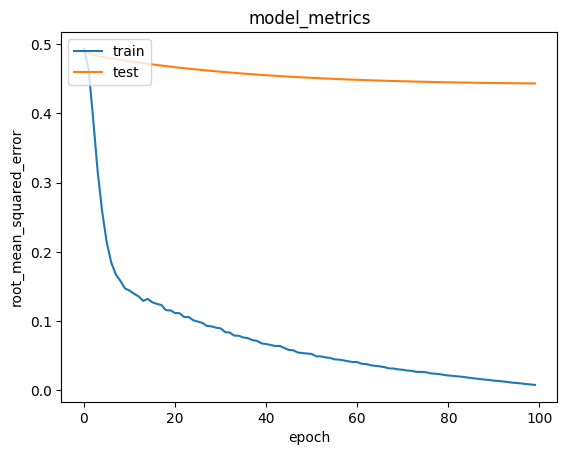

In [27]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Hasil Evaluasi pada data training cukup baik dengan root_mean_squared_error: 0.0076, walaupun pada data test perbedaan yang cukup jauh yaitu val_root_mean_squared_error: 0.4431. Akan tetapi ini masih dalam kategori baik untuk sebuah hasil dalam melakukan rekomendasi.

**Mendapatkan Rekomendasi**

Selanjutnya kita akan membuat sebuah rekomendasi berdasarkan nilai score dari interaksi yang diberikan oleh customer atau pengguna yang telah mengunjungi toko buku, dari data tersebut sistem akan memberikan rekomendasi pada pengunjung baru. Barikut hasilnya.

In [60]:
import pandas as pd
import numpy as np

# Membaca data buku
df_book = pd.read_csv('/kaggle/working/bdf_score.csv')
buku_df = pd.read_csv('/kaggle/working/buku_final.csv')

# Mengambil sample user
session_id = df_book.sessionID.sample(1).iloc[0]
buku_visited_by_session = df_book[df_book.sessionID == session_id]

# Mendapatkan ID buku yang belum dikunjungi
buku_not_visited = buku_df[~buku_df['id'].isin(buku_visited_by_session.itemID.values)]['id']
buku_not_visited = list(
    set(buku_not_visited)
    .intersection(set(buku_to_buku_encoded.keys()))
)

# Mengonversi buku yang belum dikunjungi menjadi format yang sesuai
buku_not_visited = [[buku_to_buku_encoded.get(x)] for x in buku_not_visited]
session_encoder = session_to_session_encoded.get(session_id)
session_buku_array = np.hstack(
    ([[session_encoder]] * len(buku_not_visited), buku_not_visited)
)

In [61]:
# Menghitung prediksi rating untuk buku yang belum dikunjungi
ratings = model.predict(session_buku_array).flatten()

# Mengambil indeks dari 10 rating tertinggi
top_ratings_indices = ratings.argsort()[-10:][::-1]

# Mengonversi indeks kembali ke ID buku
recommended_buku_ids = [
    buku_encoded_to_buku.get(buku_not_visited[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for session: {}'.format(session_id))
print('===' * 9)
print('Buku with high ratings from session')
print('----' * 8)

# Mengambil 5 buku dengan rating tertinggi dari sesi saat ini
top_buku_session = (
    buku_visited_by_session.sort_values(
        by='score',  # Ganti dengan kolom yang sesuai jika diperlukan
        ascending=False
    )
    .head(5)
    .itemID.values
)

# Mengambil detail buku yang sudah dikunjungi
buku_df_rows = buku_df[buku_df['id'].isin(top_buku_session)]
for row in buku_df_rows.itertuples():
    print(row.judul_buku, ':', row.topik_buku)

print('----' * 8)
print('Top 10 buku recommendation based on scores')
print('----' * 8)

# Mengambil detail buku yang direkomendasikan berdasarkan skor tertinggi
recommended_buku = buku_df[buku_df['id'].isin(recommended_buku_ids)]
for row in recommended_buku.itertuples():
    print(row.judul_buku, ':', row.topik_buku)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Showing recommendations for session: 3083
Buku with high ratings from session
--------------------------------
Der rote Planet : FB
--------------------------------
Top 10 buku recommendation based on scores
--------------------------------
Bastelspaß für die Kleinsten : YBG
Warriors: The Rise of Scourge : XADC
Gevatter Tod : FMB
Cuando El Destino Nos Alcance : FMH
Notes of Love. Sinfonie unserer Herzen : AVP
El Ratón Perdido : YFP
Black Arrow : FMB
Die Rettung des Imperiums : FLC
Bas les crocs : FMR
ONE OF US IS LYING : YFCB


**Selamat** Kita sudah dapat membuat sistem rekomendasi dengan teknik collaborative Filtering dengan melakukan top 10 buku yang memiliki nilai terbaik, dan buku dengan high score terbaik.

Dari hasil diatas terdapat kekurangan dalam menampilkan buku dengan score terbaik karena nilai score memiliki nilai yang sangat beragam atau bervariasi.